<img src="https://d1vwxdpzbgdqj.cloudfront.net/s3-public-images/learning-partners/greatlearning-brand.png" style="float:right;" width=25%></img>

### The following is the description of the dataset that we are going to use for Two Way ANOVA.


<img src="https://albertapressleader.ca/wp-content/uploads/2020/12/kidney-dialysis.jpg" width = 45%></img>

### Problem Statement:

### The dose for effective dialysis depends on duration of treatment and weight gain between treatments. To study the effects of these two factors on the number of days hospitalized attributable to kidney failure, a random sample of 10 patients per group undergone treatment in a large dialysis facility was obtained. Treatment duration was at 3 levels: short, mid and long. Average weight gain between treatments during the year was categorized into three levels: mild, moderate and severe.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [2]:
df = pd.read_csv('2 Dialysis (1).csv')

In [3]:
df.head()

,Duration,Weight_Gain,Patient,Days
0,1,1,1,3
1,1,1,2,3
2,1,1,3,14
3,1,1,4,16
4,1,1,5,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Duration     90 non-null     int64
 1   Weight_Gain  90 non-null     int64
 2   Patient      90 non-null     int64
 3   Days         90 non-null     int64
dtypes: int64(4)
memory usage: 2.9 KB


In [4]:
df['Weight_Gain']= pd.Categorical(df['Weight_Gain'])
df['Duration']= pd.Categorical(df['Duration'])
df['Patient']= pd.Categorical(df['Patient'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Duration     90 non-null     category
 1   Weight_Gain  90 non-null     category
 2   Patient      90 non-null     category
 3   Days         90 non-null     int64   
dtypes: category(3), int64(1)
memory usage: 1.7 KB


In [7]:
duration_1 = df[df['Duration']==1]['Days']
duration_2 = df[df['Duration']==2]['Days']
duration_3 = df[df['Duration']==3]['Days']

Weight_Gain_1 = df[df['Weight_Gain']==1]['Days']
Weight_Gain_2 = df[df['Weight_Gain']==2]['Days']
Weight_Gain_3 = df[df['Weight_Gain']==3]['Days']

In [9]:
from scipy import stats
#The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
#alpha = 0.05
print(stats.shapiro([duration_1]))
print(stats.shapiro([duration_2]))
print(stats.shapiro([duration_3]))

print(stats.shapiro([Weight_Gain_1]))
print(stats.shapiro([Weight_Gain_2]))
print(stats.shapiro([Weight_Gain_3]))

#Anderson Darling Test if Shapiro fails
print(stats.anderson(duration_1,dist='norm'))
print(stats.anderson(duration_2,dist='norm'))
print(stats.anderson(duration_3,dist='norm'))

ShapiroResult(statistic=0.8940047025680542, pvalue=0.006010832265019417)
ShapiroResult(statistic=0.9489384889602661, pvalue=0.15833470225334167)
ShapiroResult(statistic=0.9332407712936401, pvalue=0.05990174040198326)
ShapiroResult(statistic=0.9053216576576233, pvalue=0.01136202085763216)
ShapiroResult(statistic=0.9667301774024963, pvalue=0.45400169491767883)
ShapiroResult(statistic=0.9148339033126831, pvalue=0.019741877913475037)
AndersonResult(statistic=1.1678600124904968, critical_values=array([0.521, 0.593, 0.712, 0.83 , 0.988]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.48634982313612696, critical_values=array([0.521, 0.593, 0.712, 0.83 , 0.988]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.541924988816092, critical_values=array([0.521, 0.593, 0.712, 0.83 , 0.988]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [10]:
#Homogeniety
#The Levene test tests the null hypothesis that all input samples are from populations with equal variances.
#alpha = 0.05
print(stats.levene(duration_1,duration_2,duration_3))
print(stats.levene(Weight_Gain_1,Weight_Gain_2,Weight_Gain_3))

LeveneResult(statistic=0.513934349574488, pvalue=0.5999421217786557)
LeveneResult(statistic=1.3856337425064233, pvalue=0.25563037501060487)


## The Hypothesis for the One Way ANOVA are:
    
## $H_0$: The mean number of days of hospital stay is the same at 3 levels of treatment Weight_Gain
## $H_a$: For at least one level of treatment Weight_Gain, mean number of days of hospital stay is different


**Now, let us go ahead and perform one way ANOVA with 'Weight Gain' with respect to 'Days'.**

In [11]:
formula = 'Days ~ C(Weight_Gain)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Weight_Gain),2.0,6.822222,3.411111,0.108508,0.897293
Residual,87.0,2734.966667,31.436398,NaN,NaN


**Now, we see that the corresponding p-value is greater than alpha (0.05). Thus, we $\textbf{fail to reject}$ the $\textbf{Null Hypothesis}$ ($H_0$).**

**The mean no. of days of hospital stay is the same at 3 levels of treatment weight gain.**

**Let us now perform One Way ANOVA with the variable 'Duration' with respect to 'Days'.**

## The Hypothesis for the One Way ANOVA are:
    
## $H_0$: The mean number of days of hospital stay is the same at 3 levels of treatment Duration
## $H_a$: For at least one level of treatment Duration, mean number of days of hospital stay is different


In [11]:
df['Duration']= pd.Categorical(df['Duration'])

In [12]:
formula = 'Days ~ C(Duration)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Duration),2.0,326.955556,163.477778,5.889668,0.003991
Residual,87.0,2414.833333,27.756705,NaN,NaN


**Now, we see that the corresponding p-value is less than alpha (0.05). Thus, we $\textbf{reject}$ the $\textbf{Null Hypothesis}$ ($H_0$).**

**For at least one level of treatment Duration, mean number of days of hospital stay is different**

**Let us now perform the Two Way ANOVA. We will now analyse the effect of both the treatments on the 'Days' variable.**

In [13]:
formula = 'Days ~ C(Weight_Gain) + C(Duration)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Weight_Gain),2.0,6.822222,3.411111,0.120408,0.886709
C(Duration),2.0,326.955556,163.477778,5.770576,0.004467
Residual,85.0,2408.011111,28.329542,NaN,NaN


**The p-value in the one of the treatments is greater than $\alpha$(0.05)**

**Let us check whether there is any interaction effect between the treatments.**

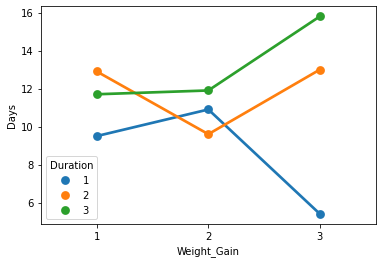

In [15]:
sns.pointplot(x='Weight_Gain', y='Days', data=df, hue='Duration',ci=None);

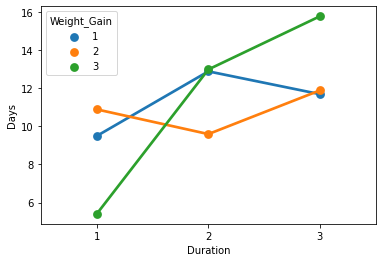

In [16]:
sns.pointplot(x='Duration', y='Days', data=df, hue='Weight_Gain',ci=None);

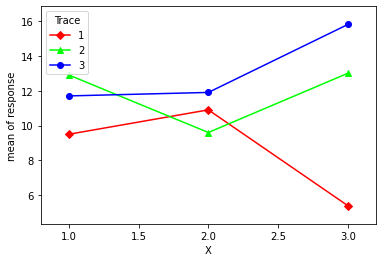

In [17]:
#Method 2 of drawing an interaction plot

from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(np.array(df['Weight_Gain']),np.array(df['Duration']),np.array(df['Days']),markers=['D','^','o']);

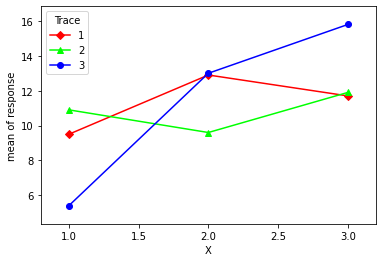

In [18]:
interaction_plot(np.array(df['Duration']),np.array(df['Weight_Gain']),np.array(df['Days']),markers=['D','^','o']);

**Still, we can see that there is some sort of interaction between the two treatments. So, we will introduce a new term while performing the Two Way ANOVA.**

In [17]:
formula = 'Days ~ C(Weight_Gain) + C(Duration) + C(Weight_Gain):C(Duration)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Weight_Gain),2.0,6.822222,3.411111,0.133498,0.875222
C(Duration),2.0,326.955556,163.477778,6.397884,0.002632
C(Weight_Gain):C(Duration),4.0,338.311111,84.577778,3.310045,0.014538
Residual,81.0,2069.700000,25.551852,NaN,NaN


**Due to the inclusion of the interaction effect term, we can see a slight change in the p-value of the first two treatments as compared to the Two-Way ANOVA without the interaction effect terms.And we see that the p-value of the interaction effect term of 'Weight_Gain' and 'Duration' suggests that the Null Hypothesis is rejected in this case.**

                                                                         ------ Happy Learning------